In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agregamos que se puedan ver todas las columnas del dataframe
pd.set_option("display.max_columns", None)

# Quitamos warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train-4.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## EDA
---

Exploramos todas las variables y como las podríamos utilizar

In [3]:
# Calcular la suma de valores nulos por columna
na_counts = data.isna().sum()

# Filtrar e imprimir solo las columnas que tienen más de 0 valores nulos
na_counts[na_counts > 0]

Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [4]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Se ve que hay algunas columnas que necesitan ser limpiadas antes de empezar a analizar. Por ejemplo:

* Annual Income -> Float.
* Age -> Int.
* Num_of_Loan -> Int.
* Num_of_Delayed_Payment -> Int.
* Changed_Credit_Limit -> Float.
* Outstanding_Debt -> Float.
* Credit_History_Age -> Convertir a numérica con distinto tratamiento.
* Monthly_Balance -> Float.


In [5]:
# Limpiamos la columna Annual income
data["Annual_Income"] = data["Annual_Income"].replace(r'[^0-9.]', '', regex=True)
data["Annual_Income"] = pd.to_numeric(data["Annual_Income"])

# Limpiamos la columna Num of Loan
data["Age"] = data["Age"].replace(r'[^0-9]', '', regex=True)
data["Age"] = pd.to_numeric(data["Age"], errors="coerce").astype(int)

# Limpiamos la columna Num of Loan
data["Num_of_Loan"] = data["Num_of_Loan"].replace(r'[^0-9]', '', regex=True)
data["Num_of_Loan"] = pd.to_numeric(data["Num_of_Loan"]).astype(int)

# Limpiamos la columna Num_of_Delayed_Payment
data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].replace(r'[^0-9]', '', regex=True)
data["Num_of_Delayed_Payment"] = pd.to_numeric(data["Num_of_Delayed_Payment"])
data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].fillna(0).astype(int)

# Limpiamos la columna Changed_Credit_Limit
data["Changed_Credit_Limit"] = data["Changed_Credit_Limit"].replace(r'[^0-9.]', '', regex=True)
data["Changed_Credit_Limit"] = pd.to_numeric(data["Changed_Credit_Limit"])

# Limpiamos la columna Changed_Credit_Limit
data["Outstanding_Debt"] = data["Outstanding_Debt"].replace(r'[^0-9.]', '', regex=True)
data["Outstanding_Debt"] = pd.to_numeric(data["Outstanding_Debt"])

# Limpiamos la columna Changed_Credit_Limit
data["Monthly_Balance"] = data["Monthly_Balance"].replace(r'[^0-9.]', '', regex=True)
data["Monthly_Balance"] = pd.to_numeric(data["Monthly_Balance"], errors="coerce")

# Columna Credit_History_Age
def convert_to_decimal(age_str):
    """Función para convertir los valores de la columna "Credit_History_Age" a formato decimal

    Args:
        age_str (str): Valor, en formato "YY Years and MM Months"

    Returns:
        El valor de los años en formato flotante
    """
    if isinstance(age_str, str):
        years = 0
        months = 0
        
        # Buscar años y meses en el texto
        years_match = re.search(r'(\d+)\s*Years?', age_str)
        months_match = re.search(r'(\d+)\s*Months?', age_str)
        
        # Extraer valores de años y meses
        if years_match:
            years = int(years_match.group(1))
        if months_match:
            months = int(months_match.group(1))
        
        # Convertir meses a años decimales
        total_years = years + (months / 12)
    else:
        total_years = np.nan
    
    return total_years

ejemplo = '11 Years and 6 Months'
print(F"Ejemplo de conversión variable Credit_History_Age. Antes: {ejemplo}. Después: {convert_to_decimal(ejemplo)}")
data["Credit_Age"] = data["Credit_History_Age"].apply(convert_to_decimal)
# Usamos la variable Credit score para realizar análisis sobre otras variables
data["CS"] = data["Credit_Score"].map({"Poor": 1, "Standard": 2, "Good":3})
data.head()

Ejemplo de conversión variable Credit_History_Age. Antes: 11 Years and 6 Months. Después: 11.5


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age,CS
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.494089,Good,22.083333,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,Good,NaN,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.209863,Good,22.250000,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.451310,Good,22.333333,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.489231,Good,22.416667,3


## Graficamos columnas categóricas

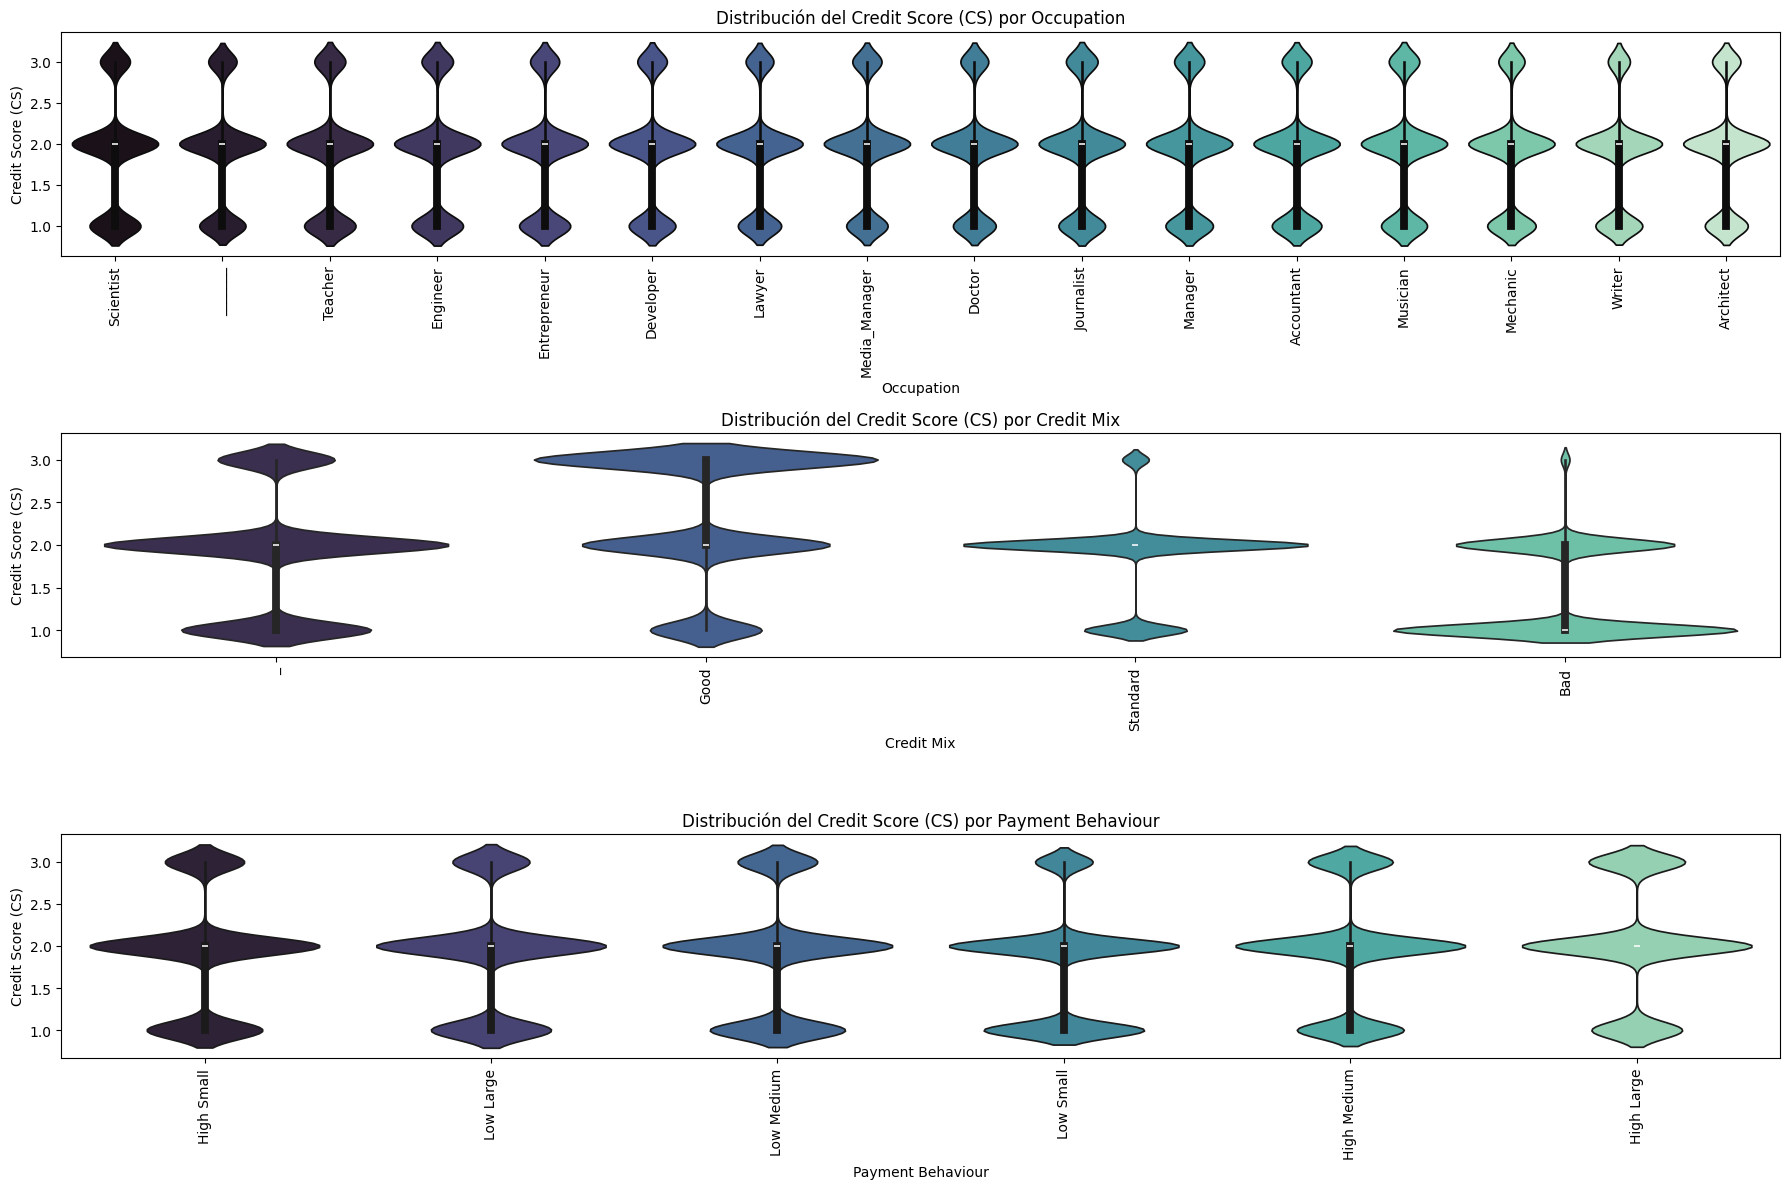

In [6]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(3, 1, figsize=(18, 12))

# Graficar el primer violinplot
sns.violinplot(x='Occupation', y='CS', data=data, ax=axes[0], palette='mako')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Credit Score (CS)')
axes[0].set_title('Distribución del Credit Score (CS) por Occupation')
axes[0].tick_params(axis='x', rotation=90)

# Graficar el segundo violinplot
sns.violinplot(x='Credit_Mix', y='CS', data=data, ax=axes[1], palette='mako')
axes[1].set_xlabel('Credit Mix')
axes[1].set_ylabel('Credit Score (CS)')
axes[1].set_title('Distribución del Credit Score (CS) por Credit Mix')
axes[1].tick_params(axis='x', rotation=90)

# Mapeamos los valores a unos más cortos
payment_behaviour_map = valid_values = {
    'High_spent_Small_value_payments': 'High Small',
    'Low_spent_Large_value_payments': 'Low Large',
    'Low_spent_Medium_value_payments': 'Low Medium',
    'Low_spent_Small_value_payments': 'Low Small',
    'High_spent_Medium_value_payments': 'High Medium',
    'High_spent_Large_value_payments': 'High Large'
}
data['Payment_Behaviour'] = data['Payment_Behaviour'].map(payment_behaviour_map)

# Graficar el Tercer violinplot
sns.violinplot(x='Payment_Behaviour', y='CS', data=data, ax=axes[2], palette='mako')
axes[2].set_xlabel('Payment Behaviour')
axes[2].set_ylabel('Credit Score (CS)')
axes[2].set_title('Distribución del Credit Score (CS) por Payment Behaviour')
axes[2].tick_params(axis='x', rotation=90)

# Ajustar el layout
plt.tight_layout()
plt.show()

De las variables categóricas la única que parece haber diferencias en el credit score es Crédit Mix, eso ayuda a la teoría de incluirla en nuestros análisis.

## Graficamos la distribución de las variables numéricas

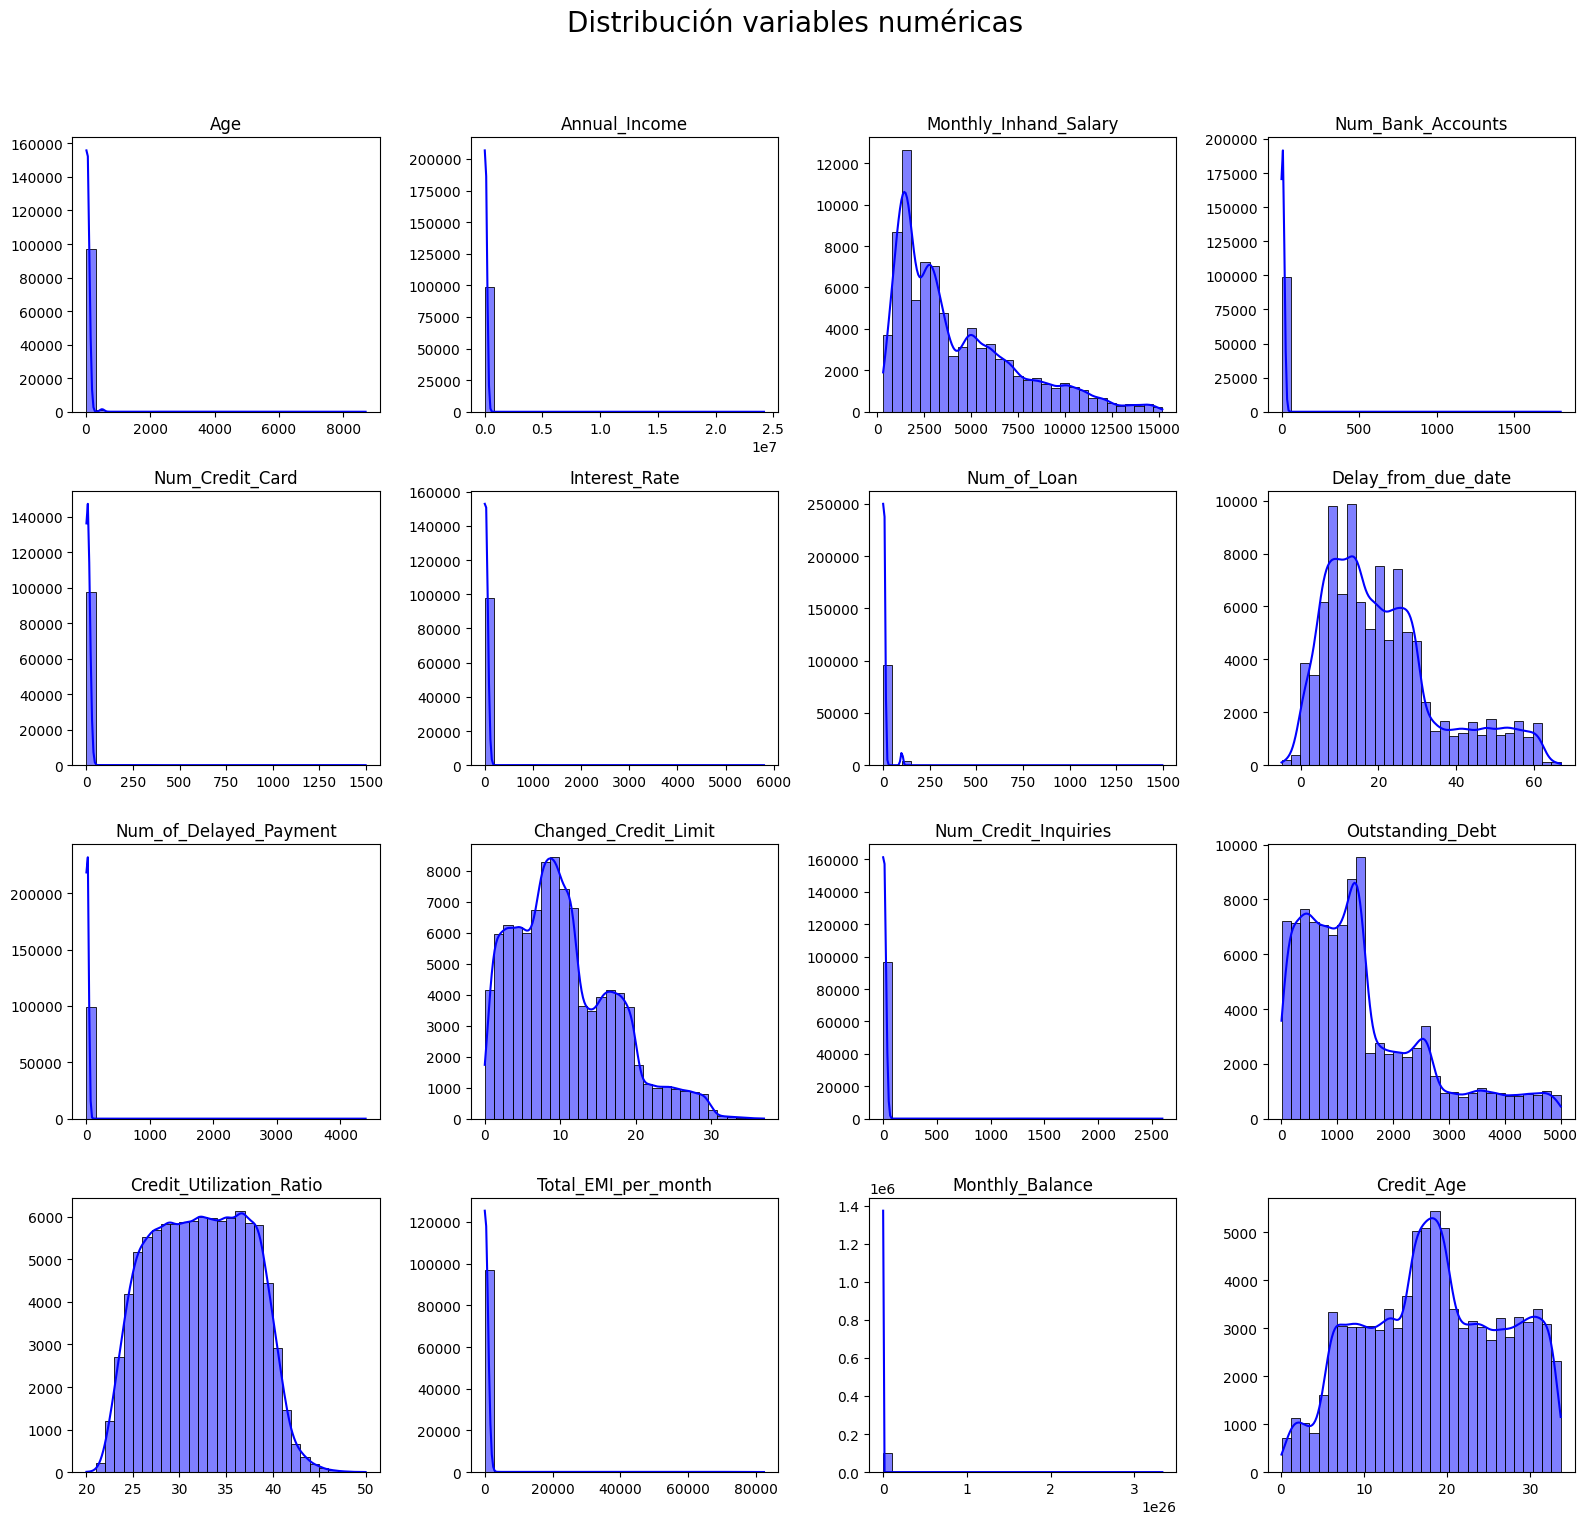

In [7]:
# Elegimos las columnas que sean numéricas
numeric_cols = [col for col in data.columns if data[col].dtype != 'object' and col != "CS"]


# Creamos una figura con subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Distribución variables numéricas', fontsize=20)

# Graficamos cada columna por medio de un ciclo
for i, column in enumerate(numeric_cols):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], bins=30, kde=True, color='blue', ax=axes[row, col])
    axes[row, col].set_title(column)
    # Dejamos en blanco los labels de los subplots para apreciar mejor las gráficas
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Ajustamos el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Parece que en algunas columnas hay datos muy atípicos, que podrían tratarse de errores, por ejemplo:

* Annual Income
* Num bank accounts
* Num credit Card
* Interest Rate
* Num of Loan
* Num of delayed Payment
* Num Credit Inquiries
* Total EMI per Month

In [8]:
# Vemos datos estadísticos de las variables con dudas.
data[['Age','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Monthly_Balance']]\
            .describe(percentiles=[0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95]).T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,80%,85%,90%,95%,max
Age,1.195097e+02,6.847573e+02,14.00000,25.000000,34.000000,42.000000,44.000000,47.000000,50.000000,54.000000,8.698000e+03
Annual_Income,1.764157e+05,1.429618e+06,7005.93000,19457.500000,37578.610000,72790.920000,82334.016000,95332.230000,113085.870000,134533.320000,2.419806e+07
Num_Bank_Accounts,1.709128e+01,1.174048e+02,-1.00000,3.000000,6.000000,7.000000,8.000000,8.000000,9.000000,10.000000,1.798000e+03
Num_Credit_Card,2.247443e+01,1.290574e+02,0.00000,4.000000,5.000000,7.000000,7.000000,8.000000,9.000000,10.000000,1.499000e+03
Interest_Rate,7.246604e+01,4.664226e+02,1.00000,8.000000,13.000000,20.000000,23.000000,26.000000,29.000000,33.000000,5.797000e+03
Num_of_Loan,1.076196e+01,6.178993e+01,0.00000,2.000000,3.000000,6.000000,6.000000,7.000000,8.000000,9.000000,1.496000e+03
Num_of_Delayed_Payment,2.877941e+01,2.181148e+02,0.00000,8.000000,13.000000,18.000000,19.000000,20.000000,21.000000,23.000000,4.397000e+03
Num_Credit_Inquiries,2.775425e+01,1.931773e+02,0.00000,3.000000,6.000000,9.000000,10.000000,11.000000,12.000000,13.000000,2.597000e+03
Total_EMI_per_month,1.403118e+03,8.306041e+03,0.00000,30.306660,69.249473,161.224249,190.641975,228.382711,285.631602,437.012753,8.233100e+04
Monthly_Balance,3.036437e+22,3.181295e+24,0.00776,270.114473,336.742315,470.332133,524.095741,602.908248,708.104928,862.900078,3.333333e+26


Observando algunos datos estadísticos con mucha seguridad que hay errores en los datos, ya que hay brincos muy drásticos a partir del percentil 95, por lo que vamos a hacer una limpieza de sustituir estos datos por la mediana de cada columna (usamos la mediana debido a los datos atípicos, usar la media podría causar ruido).

In [10]:
# Limpiamos datos atípicos
def replace_outliers_with_median(series, perc):
    """
    Reemplaza los valores atípicos en una serie (columna de un DataFrame) con la mediana.
    Los valores atípicos se definen como aquellos que están por encima del percentil 90.
    
    Parameters:
    series (pd.Series): La columna del DataFrame a la que se aplicará la función.
    percentil (float): A partir de cual percentil sustituir valores.

    Returns:
    pd.Series: La columna con los valores atípicos reemplazados por la mediana.
    """
    # Calcula el percentil establecido
    p90 = series.quantile(perc)
    
    # Calcula la mediana
    median = series.median()
    
    # Reemplaza los valores mayores al percentil 90 por la mediana
    return series.apply(lambda x: median if x > p90 else x)

# Limpiamos las variables en bucle
for i in ['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
      'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Monthly_Balance']:
    data[i] = replace_outliers_with_median(data[i], perc=0.95)

# Limpiamos la columna credit mix
credit_mix_mapping = {
    'Bad': 1,
    'Standard': 2,
    'Good': 3,
    np.nan: 4 
}

# Reemplazar '_' con NaN antes de mapear
data['Credit_Mix'] = data['Credit_Mix'].replace('_', np.nan)

# Aplicar el mapeo
data['Credit_Mix_Numeric'] = data['Credit_Mix'].map(credit_mix_mapping)

# Age se castigará con 0 a datos menores a 18 y mayores a 100
data['Age'] = data['Age'].apply(lambda x: 0 if x < 18 or x > 100 else x)


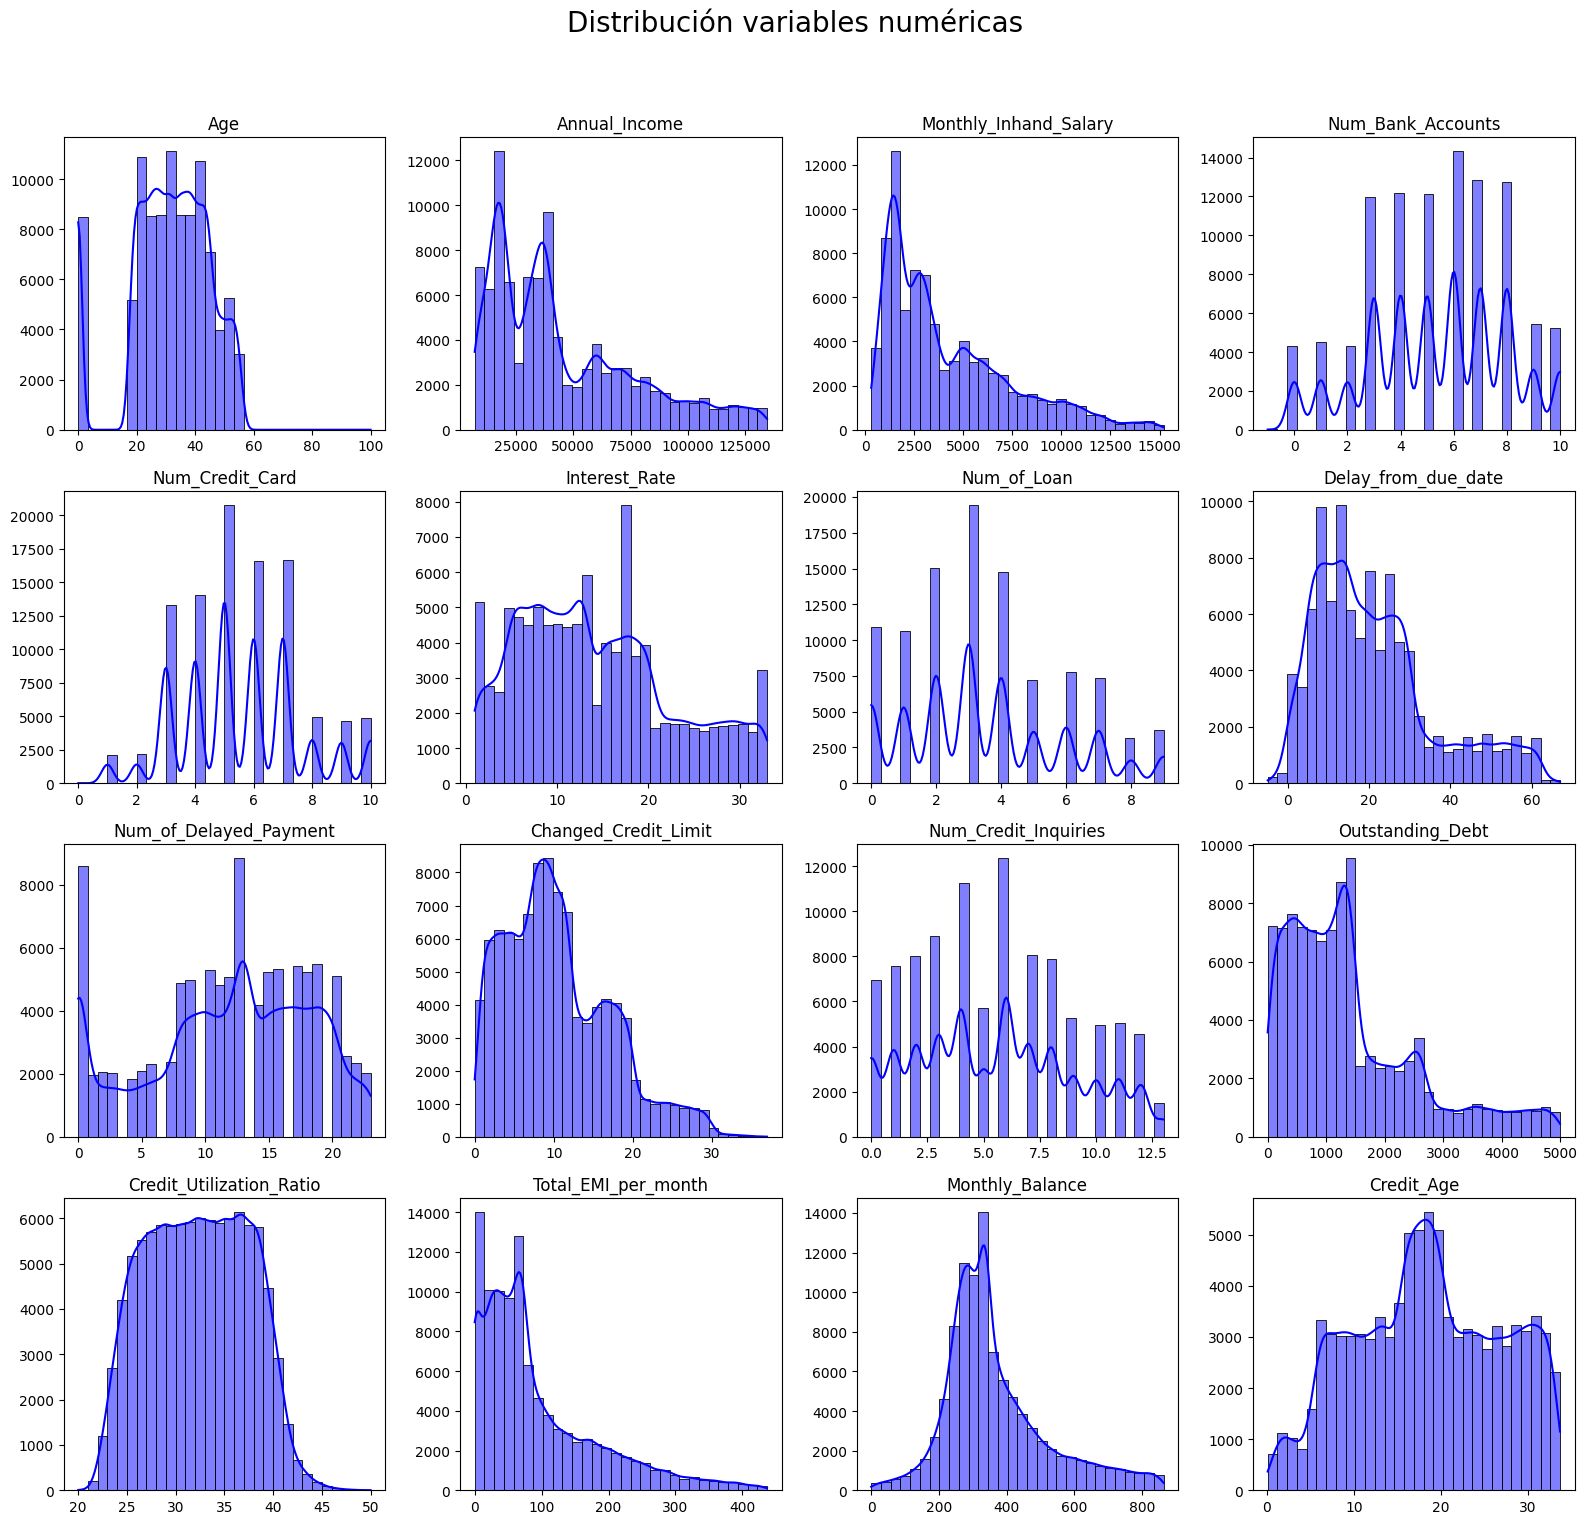

In [11]:
# Vemos las nuevas distribuciones
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Distribución variables numéricas', fontsize=20)

# Graficamos cada columna por medio de un ciclo
for i, column in enumerate(numeric_cols):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], bins=30, kde=True, color='blue', ax=axes[row, col])
    axes[row, col].set_title(column)
    # Dejamos en blanco los labels de los subplots para apreciar mejor las gráficas
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

# Ajustamos el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Columnas que incuiremos directamente o indirectamente
* Outstanding_Debt
* Annual_Income
* Changed_Credit_Limit
* Delay_from_due_date
* Num_of_Loan
* Num_Credit_Card
* Monthly_Inhand_Salary
* Num_Bank_Accounts
* Credit Mix
* Age

---
Usaremos estas variables porque proporcionan una visión integral de la situación financiera de una persona y son relevantes para calcular el riesgo crediticio. Variables como `Outstanding_Debt`, `Annual_Income`, y `Changed_Credit_Limit` reflejan la capacidad de endeudamiento y el historial de manejo de crédito. `Delay_from_due_date` es clave para evaluar el comportamiento de pago, mientras que `Num_of_Loan`, `Num_Credit_Card`, y `Num_Bank_Accounts` permiten medir la exposición a diferentes fuentes de crédito. `Credit_Mix` indica la diversidad de productos financieros utilizados, y `Age` es relevante para identificar patrones de riesgo a lo largo de la vida financiera del individuo. Estas variables ayudan a construir un perfil completo para predecir de manera precisa la probabilidad de incumplimiento y el puntaje crediticio.

A continuación se crearán algunas variables compuestas de las mencionadas anteriormente.

In [12]:
# Calculamos el ratio de deuda a ingreso. Este ratio mide la proporción de la deuda total en comparación con el ingreso anual.
data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Annual_Income']

# Calculamos el ratio de utilización del crédito. Este ratio mide la proporción de deuda pendiente en comparación con el límite de crédito disponible.
data['Credit_Utilization_Ratio'] = data['Outstanding_Debt'] / data['Changed_Credit_Limit']

# Calculamos el promedio de retraso en los pagos. 
data['Avg_Delay_From_Due_Date'] = data.groupby('SSN')['Delay_from_due_date'].transform('mean')

# Calculamos el número total de créditos activos combinando el número de préstamos y el número de tarjetas de crédito.
data['Active_Credits'] = data['Num_of_Loan'] + data['Num_Credit_Card']

# Calculamos la estabilidad del ingreso. Este índice mide la proporción del salario mensual en comparación con el ingreso anual.
data['Income_Stability'] = data['Monthly_Inhand_Salary'] / (data['Annual_Income'] / 12)

# Calculamos el ratio de ingresos a créditos. Este ratio mide la proporción del ingreso anual en comparación con el número de cuentas bancarias.
data['Income_to_Credit_Ratio'] = data['Annual_Income'] / data['Num_Bank_Accounts']


In [14]:
data[["Outstanding_Debt", "Annual_Income", "Changed_Credit_Limit", "Delay_from_due_date", "Num_of_Loan", "Num_Credit_Card", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Credit_Mix", "Age"]]


,Outstanding_Debt,Annual_Income,Changed_Credit_Limit,Delay_from_due_date,Num_of_Loan,Num_Credit_Card,Monthly_Inhand_Salary,Num_Bank_Accounts,Credit_Mix,Age
0,809.98,19114.12,11.27,3,4.0,4.0,1824.843333,3.0,NaN,23
1,809.98,19114.12,11.27,-1,4.0,4.0,NaN,3.0,Good,23
2,809.98,19114.12,NaN,3,4.0,4.0,NaN,3.0,Good,0
3,809.98,19114.12,6.27,5,4.0,4.0,NaN,3.0,Good,23
4,809.98,19114.12,11.27,6,4.0,4.0,1824.843333,3.0,Good,23
...,...,...,...,...,...,...,...,...,...,...
99995,502.38,39628.99,11.50,23,2.0,6.0,3359.415833,4.0,NaN,25
99996,502.38,39628.99,11.50,18,2.0,6.0,3359.415833,4.0,NaN,25
99997,502.38,39628.99,11.50,27,2.0,6.0,3359.415833,4.0,Good,25
99998,502.38,39628.99,11.50,20,2.0,6.0,3359.415833,4.0,Good,25
